In [26]:
import os
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier, XGBRFClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from xgboost import XGBClassifier
import lightgbm as lgb
import seaborn as sns
from sklearn.ensemble import *
from catboost import CatBoostClassifier
import numpy as np
import itertools
import shap
import joblib

In [2]:
os.chdir('..')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv('artifacts/data_transformation/train.csv')

In [5]:
df = df.loc[:, ~df.columns.str.startswith('NATURE')]

In [6]:
df.head()

ACC_NO  MIN_DUE_AMT_1  MIN_DUE_AMT_2  MIN_DUE_AMT_3  MIN_DUE_AMT_4  \
0   93944.0         542.70           0.00           0.00           0.00   
1    7238.0        7798.39        4076.19        2045.47        1551.43   
2   11226.0           0.00           0.00           0.00           0.00   
3   94712.0         818.80         650.04         579.68         830.91   
4  119466.0         570.24         618.13         602.91         250.00   

   MIN_DUE_AMT_5  MIN_DUE_AMT_6  OVER_LIMIT_FEE_1  OVER_LIMIT_FEE_2  \
0           0.00           0.00               0.0               0.0   
1        7527.77         887.62               0.0               0.0   
2           0.00         250.00               0.0               0.0   
3         577.58         636.81               0.0               0.0   
4         250.00         250.00               0.0               0.0   

   OVER_LIMIT_FEE_3  OVER_LIMIT_FEE_4  OVER_LIMIT_FEE_5  OVER_LIMIT_FEE_6  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   TOT_SPEND_AMT_1  TOT_SPEND_AMT_2  TOT_SPEND_AMT_3  TOT_SPEND_AMT_4  \
0         12896.00         78185.72         16409.23          9008.00   
1         79873.03         67408.22        165612.27         87593.55   
2             0.00             0.00             0.00             0.00   
3             0.00             0.00          1739.70             0.00   
4             0.00         42779.00          8278.68         17041.09   

   TOT_SPEND_AMT_5  TOT_SPEND_AMT_6  PAYMENT_AMT_1  PAYMENT_AMT_2  \
0             0.00             0.00         3000.0            0.0   
1         42954.06        179232.44       195000.0        51500.0   
2             0.00             0.00            0.0            0.0   
3             0.00          6314.00        13000.0        20500.0   
4          2238.00             0.00        15000.0        15500.0   

   PAYMENT_AMT_3  PAYMENT_AMT_4  PAYMENT_AMT_5  PAYMENT_AMT_6  TOTAL_OS_1  \
0        42000.0         3000.0         1000.0         2000.0   137387.06   
1        52000.0        39000.0       188200.0        22500.0   140000.80   
2            0.0            0.0            0.0            0.0      -76.31   
3        16300.0        14500.0        20800.0        14500.0    97219.38   
4        16200.0         5500.0         3500.0         3500.0    97667.70   

   TOTAL_OS_2  TOTAL_OS_3  TOTAL_OS_4  TOTAL_OS_5  TOTAL_OS_6  LATE_PAY_FEE_1  \
0  125209.110    46277.59    65720.36    59712.36    60712.36          1750.0   
1  255127.770   232021.77   117428.98    68785.43   213981.38             0.0   
2     -76.310      -76.31      -76.31      -76.31      -76.31             0.0   
3  110219.375   130469.38   139029.67   153529.69   174329.67             0.0   
4  112667.700    85388.70    93310.02    81768.93    83030.93             0.0   

   LATE_PAY_FEE_2  LATE_PAY_FEE_3  LATE_PAY_FEE_4  LATE_PAY_FEE_5  \
0             0.0             0.0             0.0             0.0   
1             0.0          1750.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   LATE_PAY_FEE_6  A_SCORE_VALUE  FINAL_LIMIT  3_MONTH_NPL_STATUS   AGE  \
0             0.0          194.0     317000.0                 0.0  56.0   
1             0.0          217.0    1000000.0                 0.0  35.0   
2             0.0          231.0    1037000.0                 0.0  55.0   
3             0.0          233.0     500000.0                 0.0  37.0   
4          1750.0          201.0     376000.0                 0.0  56.

In [7]:
df_1=df.copy()

In [8]:
df_1['LATE_PAY_FEE']=df_1['LATE_PAY_FEE_1']+df_1['LATE_PAY_FEE_2']+df_1['LATE_PAY_FEE_3']+df_1['LATE_PAY_FEE_4']+df_1['LATE_PAY_FEE_5']+df_1['LATE_PAY_FEE_6']


df_1['OVER_LIMIT_FEE']=df_1['OVER_LIMIT_FEE_1']+df_1['OVER_LIMIT_FEE_2']+df_1['OVER_LIMIT_FEE_3']+df_1['OVER_LIMIT_FEE_4']+df_1['OVER_LIMIT_FEE_5']+df_1['OVER_LIMIT_FEE_6']

In [9]:
df_1=df_1.drop(columns=['LATE_PAY_FEE_1','LATE_PAY_FEE_2','LATE_PAY_FEE_3','LATE_PAY_FEE_4','LATE_PAY_FEE_5','LATE_PAY_FEE_6'])

df_1=df_1.drop(columns=['OVER_LIMIT_FEE_1','OVER_LIMIT_FEE_2','OVER_LIMIT_FEE_3','OVER_LIMIT_FEE_4','OVER_LIMIT_FEE_5','OVER_LIMIT_FEE_6'])

In [10]:
df_2=df_1.copy()

df_2=df_2.drop(columns=['A_SCORE_VALUE'])

In [11]:
df_3=df_2.copy()

df_3['TOTAL_OS']=(df_3['TOTAL_OS_1']+df_3['TOTAL_OS_2']+df_3['TOTAL_OS_3']+df_3['TOTAL_OS_4']+df_3['TOTAL_OS_5']+df_3['TOTAL_OS_6'])/6

df_3=df_3.drop(columns=['TOTAL_OS_1','TOTAL_OS_2','TOTAL_OS_3','TOTAL_OS_4','TOTAL_OS_5','TOTAL_OS_6'])

In [12]:

spend_columns = ['TOT_SPEND_AMT_1', 'TOT_SPEND_AMT_2', 'TOT_SPEND_AMT_3', 'TOT_SPEND_AMT_4', 'TOT_SPEND_AMT_5', 'TOT_SPEND_AMT_6']
df_3_spend = df_3[spend_columns]

pay_columns = ['PAYMENT_AMT_1', 'PAYMENT_AMT_2', 'PAYMENT_AMT_3', 'PAYMENT_AMT_4', 'PAYMENT_AMT_5', 'PAYMENT_AMT_6']
df_3_pay = df_3[pay_columns]

settler_columns = ['REV_SETT_1_SETTLER', 'REV_SETT_2_SETTLER', 'REV_SETT_3_SETTLER', 'REV_SETT_4_SETTLER', 'REV_SETT_5_SETTLER', 'REV_SETT_6_SETTLER']
df_3_set = df_3[settler_columns]

revolver_columns = ['REV_SETT_1_REVOLVER', 'REV_SETT_2_REVOLVER', 'REV_SETT_3_REVOLVER', 'REV_SETT_4_REVOLVER', 'REV_SETT_5_REVOLVER', 'REV_SETT_6_REVOLVER']
df_3_rev = df_3[revolver_columns]

df_3['SPENDING_MONTHS'] = (df_3_spend>0).sum(axis=1)
df_3['PAYMENT_MONTHS'] = (df_3_pay>0).sum(axis=1)
#df_3['SETTLER_MONTHS'] = (df_3_set>0).sum(axis=1)

In [13]:
df_3['MONTHS_SINCE_LAST_SPEND'] = df_3_spend.gt(0).idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]) - 1)
df_3['MONTHS_SINCE_LAST_SPEND'] = df_3['MONTHS_SINCE_LAST_SPEND'].where(df_3_spend.gt(0).any(axis=1), len(spend_columns))

In [14]:
df_3['MONTHS_SINCE_LAST_PAY'] = df_3_pay.gt(0).idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]) - 1)
df_3['MONTHS_SINCE_LAST_PAY'] = df_3['MONTHS_SINCE_LAST_PAY'].where(df_3_pay.gt(0).any(axis=1), len(pay_columns))

In [15]:
df_3['MONTHS_SINCE_LAST_SETTLER'] = df_3_set.gt(0).idxmax(axis=1).apply(lambda x: int(x.split('_')[2]) - 1)
df_3['MONTHS_SINCE_LAST_SETTLER'] = df_3['MONTHS_SINCE_LAST_SETTLER'].where(df_3_set.gt(0).any(axis=1), len(settler_columns))

In [16]:
df_3['MONTHS_SINCE_LAST_REVOLVER'] = df_3_rev.gt(0).idxmax(axis=1).apply(lambda x: int(x.split('_')[2]) - 1)
df_3['MONTHS_SINCE_LAST_REVOLVER'] = df_3['MONTHS_SINCE_LAST_REVOLVER'].where(df_3_rev.gt(0).any(axis=1), len(revolver_columns))

In [17]:
df_3.head()

ACC_NO  MIN_DUE_AMT_1  MIN_DUE_AMT_2  MIN_DUE_AMT_3  MIN_DUE_AMT_4  \
0   93944.0         542.70           0.00           0.00           0.00   
1    7238.0        7798.39        4076.19        2045.47        1551.43   
2   11226.0           0.00           0.00           0.00           0.00   
3   94712.0         818.80         650.04         579.68         830.91   
4  119466.0         570.24         618.13         602.91         250.00   

   MIN_DUE_AMT_5  MIN_DUE_AMT_6  TOT_SPEND_AMT_1  TOT_SPEND_AMT_2  \
0           0.00           0.00         12896.00         78185.72   
1        7527.77         887.62         79873.03         67408.22   
2           0.00         250.00             0.00             0.00   
3         577.58         636.81             0.00             0.00   
4         250.00         250.00             0.00         42779.00   

   TOT_SPEND_AMT_3  TOT_SPEND_AMT_4  TOT_SPEND_AMT_5  TOT_SPEND_AMT_6  \
0         16409.23          9008.00             0.00             0.00   
1        165612.27         87593.55         42954.06        179232.44   
2             0.00             0.00             0.00             0.00   
3          1739.70             0.00             0.00          6314.00   
4          8278.68         17041.09          2238.00             0.00   

   PAYMENT_AMT_1  PAYMENT_AMT_2  PAYMENT_AMT_3  PAYMENT_AMT_4  PAYMENT_AMT_5  \
0         3000.0            0.0        42000.0         3000.0         1000.0   
1       195000.0        51500.0        52000.0        39000.0       188200.0   
2            0.0            0.0            0.0            0.0            0.0   
3        13000.0        20500.0        16300.0        14500.0        20800.0   
4        15000.0        15500.0        16200.0         5500.0         3500.0   

   PAYMENT_AMT_6  FINAL_LIMIT  3_MONTH_NPL_STATUS   AGE  MONTH_END_BAL_LCY  \
0         2000.0     317000.0                 0.0  56.0             397.13   
1        22500.0    1000000.0                 0.0  35.0               0.00   
2            0.0    1037000.0                 0.0  55.0               0.00   
3        14500.0     500000.0                 0.0  37.0               0.00   
4         3500.0     376000.0                 0.0  56.0               0.00   

   REV_SETT_1_REVOLVER  REV_SETT_1_SETTLER  REV_SETT_2_REVOLVER  \
0                  1.0                 0.0                  0.0   
1                  0.0                 1.0                  1.0   
2                  0.0                 1.0                  0.0   
3                  0.0                 1.0                  0.0   
4                  0.0                 1.0                  0.0   

   REV_SETT_2_SETTLER  REV_SETT_3_REVOLVER  REV_SETT_3_SETTLER  \
0                 1.0                  0.0                 1.0   
1                 0.0                  1.0                 0.0   
2                 1.0                  0.0                 1.0   
3                 1.0                  0.0                 1.0   
4                 1.0                  0.0                 1.0   

   REV_SETT_4_REVOLVER  REV_SETT_4_SETTLER  REV_SETT_5_REVOLVER  \
0                  0.0                 1.0                  0.0   
1                  0.0                 1.0                  0.0   
2                  0.0                 1.0                  0.0   
3                  0.0                 1.0                  0.0   
4                  0.0                 1.0                  0.0   

   REV_SETT_5_SETTLER  REV_SETT_6_REVOLVER  REV_SETT_6_SETTLER  \
0                 1.0                  0.0                 1.0   
1                 1.0                  0.0                 1.0   
2                 1.0                  0.0                 1.0   
3                 1.0                  0.0                 1.0   
4                 1.0                  1.0                 0.0   

   RESTRUCTURED_PLAN_N  RESTRUCTURED_PLAN_Y  ST_GENERAL_ACC_BLCK  \
0                  1.0                  0.0                  0.0   
1             

In [18]:
df1=df_3.drop(columns=['ACC_NO'])

In [19]:
x=df1.drop(columns=['3_MONTH_NPL_STATUS'])
y=df1.loc[:,['3_MONTH_NPL_STATUS']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y,shuffle=True,random_state=42)

In [21]:
params_check = {
    'boosting_type': 'dart',
    'objective': 'binary',
    'scale_pos_weight': 120,
    'learning_rate': 0.05,
    'min_child_weight': 25,
    'num_leaves':100,
    'max_depth':31,
    'subsample':0.5,
    'colsample_bytree':0.3,
    'verbosity': -1,
    'n_estimators': 1000,
    'seed': 42
}

In [22]:
clf_lgb = lgb.LGBMClassifier(**params_check)

clf_lgb.fit(X_train,y_train)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(boosting_type='dart', colsample_bytree=0.3, learning_rate=0.05,
               max_depth=31, min_child_weight=25, n_estimators=1000,
               num_leaves=100, objective='binary', scale_pos_weight=120,
               seed=42, subsample=0.5, verbosity=-1)

In [23]:
lgb_pred = clf_lgb.predict(X_test)
lgb_pred_prob = clf_lgb.predict_proba(X_test)

In [24]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    print('----------------------------------------------\n')
    
    print('Train F1: {:.2f}%'.format(f1_score(y_train, train_pred) * 100))
    print('Train Precision (Class 1): {:.2f}%'.format(precision_score(y_train, train_pred) * 100))
    print('Train Recall (Class 0): {:.2f}%'.format(recall_score(y_train, train_pred,pos_label=0) * 100))
    print('Train Recall: {:.2f}%'.format(recall_score(y_train, train_pred) * 100))
    
    print('----------------------------------------------\n')
    
    conf_matrix_xgb = confusion_matrix(y_train,train_pred)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('\n----------------------------------------------\n')
    test_pred = model.predict(X_test)

    
    print('Test F1: {:.2f}%'.format(f1_score(y_test, test_pred) * 100))
    print('Test Precision (Class 1): {:.2f}%'.format(precision_score(y_test, test_pred) * 100))
    print('Test Recall (Class 0): {:.2f}%'.format(recall_score(y_test, test_pred,pos_label=0) * 100))
    print('Test Recall: {:.2f}%'.format(recall_score(y_test, test_pred) * 100))
    
    print('----------------------------------------------\n')
    
    
    conf_matrix_xgb = confusion_matrix(y_test,test_pred)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

----------------------------------------------

Train F1: 87.14%
Train Precision (Class 1): 77.22%
Train Recall (Class 0): 99.87%
Train Recall: 100.00%
----------------------------------------------



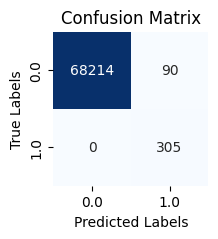


----------------------------------------------

Test F1: 28.57%
Test Precision (Class 1): 30.70%
Test Recall (Class 0): 99.73%
Test Recall: 26.72%
----------------------------------------------



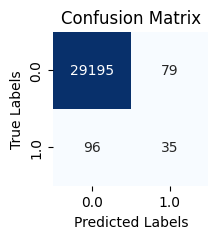

In [25]:
evaluate_model(clf_lgb,X_train,y_train,X_test,y_test)

In [96]:
lgb_ta=(lgb_pred_prob[:,1]>=0.5).astype(int)


In [97]:
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, lgb_ta) * 100))
print('F1: {:.2f}%'.format(f1_score(y_test, lgb_ta) * 100))
print('Precision (Class 1): {:.2f}%'.format(precision_score(y_test, lgb_ta) * 100))
print('Recall (Class 0): {:.2f}%'.format(recall_score(y_test, lgb_ta,pos_label=0) * 100))
print('Recall: {:.2f}%'.format(recall_score(y_test, lgb_ta) * 100))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, lgb_ta) * 100))

AUC: 63.22%
F1: 28.57%
Precision (Class 1): 30.70%
Recall (Class 0): 99.73%
Recall: 26.72%
Accuracy: 99.40%


In [98]:
conf_matrix_xgb = confusion_matrix(y_test,lgb_ta)
conf_matrix_xgb

array([[29195,    79],
       [   96,    35]], dtype=int64)

In [86]:
X_train.to_csv('x_train.csv')

In [ ]:
#joblib.dump(clf_lgb,'models/model_v2.pkl')

['models/model_v2.pkl']

In [99]:
gap_df=X_train.copy()
gap_df['y_pred']=clf_lgb.predict(X_train)
gap_df['y_pred_proba']=clf_lgb.predict_proba(X_train)[:,1]
gap_df['y_true']=y_train
gap_df2=gap_df.copy()
gap_df=gap_df[gap_df['y_pred']!=gap_df['y_true']]
gap_df_1=gap_df.drop(columns=['y_pred','y_true','y_pred_proba'])

In [100]:
gap_df.head()

MIN_DUE_AMT_1  MIN_DUE_AMT_2  MIN_DUE_AMT_3  MIN_DUE_AMT_4  \
6444       507919.88      465223.62      422780.66      382713.30   
40567         870.57         400.00           0.00           0.00   
59087         724.39      191615.39      168049.77      145775.98   
30311       19682.70       55569.96       42229.12       33063.81   
61993         788.81         485.40         250.00           0.00   

       MIN_DUE_AMT_5  MIN_DUE_AMT_6  TOT_SPEND_AMT_1  TOT_SPEND_AMT_2  \
6444       337761.28      302377.06              0.0              0.0   
40567           0.00           0.00              0.0              0.0   
59087      109527.74        1955.89              0.0              0.0   
30311       26318.48       19674.95              0.0              0.0   
61993           0.00           0.00              0.0              0.0   

       TOT_SPEND_AMT_3  TOT_SPEND_AMT_4  TOT_SPEND_AMT_5  TOT_SPEND_AMT_6  \
6444               0.0              0.0              0.0              0.0   
40567              0.0              0.0              0.0              0.0   
59087              0.0              0.0              0.0              0.0   
30311              0.0              0.0              0.0              0.0   
61993              0.0              0.0              0.0              0.0   

       PAYMENT_AMT_1  PAYMENT_AMT_2  PAYMENT_AMT_3  PAYMENT_AMT_4  \
6444             0.0       800000.0            0.0            0.0   
40567            0.0            0.0            0.0            0.0   
59087        18120.0            0.0            0.0            0.0   
30311        11500.0        11500.0        45000.0            0.0   
61993            0.0            0.0            0.0            0.0   

       PAYMENT_AMT_5  PAYMENT_AMT_6  FINAL_LIMIT   AGE  MONTH_END_BAL_LCY  \
6444             0.0            0.0     885000.0  40.0            1200.00   
40567            0.0            0.0    2959000.0  65.0               0.00   
59087            0.0         2000.0     500000.0  40.0            4780.86   
30311            0.0            0.0     175000.0  48.0               0.00   
61993            0.0            0.0     541000.0  61.0               0.00   

       REV_SETT_1_REVOLVER  REV_SETT_1_SETTLER  REV_SETT_2_REVOLVER  \
6444                   1.0                 0.0                  1.0   
40567                  1.0                 0.0                  0.0   
59087                  1.0                 0.0                  0.0   
30311                  1.0                 0.0                  1.0   
61993                  1.0                 0.0                  1.0   

       REV_SETT_2_SETTLER  REV_SETT_3_REVOLVER  REV_SETT_3_SETTLER  \
6444                  0.0                  1.0                 0.0   
40567                 1.0                  0.0                 1.0   
59087                 1.0                  1.0                 0.0   
30311                 0.0                  1.0                 0.0   
61993                 0.0                  1.0                 0.0   

       REV_SETT_4_REVOLVER  REV_SETT_4_SETTLER  REV_SETT_5_REVOLVER  \
6444                   1.0                 0.0                  1.0   
40567                  0.0                 1.0                  0.0   
59087                  1.0                 0.0                  1.0   
30311                  1.0                 0.0                  1.0   
61993                  0.0                 1.0                  0.0   

       REV_SETT_5_SETTLER  REV_SETT_6_REVOLVER  REV_SETT_6_SETTLER  \
6444                  0.0                  1.0                 0.0   
40567                 1.0                  0.0                 1.0   
59087                 0.0                  1.0                 0.0   
30311                 0.0                  1.0                 0.0   
61993                 1.0                  0.0                 1.0   

       RESTRUCTURED_PLAN_N  RESTRUCTURED_PLAN_Y  ST_GENERAL_ACC_BLCK  \
6444                   1.0                  

In [106]:
gap_df2[ (gap_df2['y_true']!=gap_df2['y_pred']) & (gap_df2['y_pred_proba']>=0.85)]#['y_true'].value_counts()

MIN_DUE_AMT_1  MIN_DUE_AMT_2  MIN_DUE_AMT_3  MIN_DUE_AMT_4  \
96076       12163.71       10390.41        8683.05        7200.64   
38577        1042.51         625.32         274.89           0.00   
1928            0.00           0.00           0.00           0.00   

       MIN_DUE_AMT_5  MIN_DUE_AMT_6  TOT_SPEND_AMT_1  TOT_SPEND_AMT_2  \
96076        5780.40        4422.89              0.0              0.0   
38577           0.00           0.00              0.0              0.0   
1928        20421.04       20491.57              0.0              0.0   

       TOT_SPEND_AMT_3  TOT_SPEND_AMT_4  TOT_SPEND_AMT_5  TOT_SPEND_AMT_6  \
96076              0.0              0.0              0.0              0.0   
38577              0.0              0.0              0.0              0.0   
1928               0.0              0.0              0.0              0.0   

       PAYMENT_AMT_1  PAYMENT_AMT_2  PAYMENT_AMT_3  PAYMENT_AMT_4  \
96076            0.0        45000.0            0.0            0.0   
38577            0.0            0.0            0.0            0.0   
1928             0.0            0.0            0.0            0.0   

       PAYMENT_AMT_5  PAYMENT_AMT_6  FINAL_LIMIT   AGE  MONTH_END_BAL_LCY  \
96076            0.0            0.0      97000.0  30.0                0.0   
38577            0.0            0.0    1375000.0  77.0                0.0   
1928             0.0       266000.0     280000.0  37.0                0.0   

       REV_SETT_1_REVOLVER  REV_SETT_1_SETTLER  REV_SETT_2_REVOLVER  \
96076                  1.0                 0.0                  1.0   
38577                  1.0                 0.0                  1.0   
1928                   0.0                 1.0                  0.0   

       REV_SETT_2_SETTLER  REV_SETT_3_REVOLVER  REV_SETT_3_SETTLER  \
96076                 0.0                  1.0                 0.0   
38577                 0.0                  1.0                 0.0   
1928                  1.0                  0.0                 1.0   

       REV_SETT_4_REVOLVER  REV_SETT_4_SETTLER  REV_SETT_5_REVOLVER  \
96076                  1.0                 0.0                  1.0   
38577                  0.0                 1.0                  0.0   
1928                   0.0                 1.0                  0.0   

       REV_SETT_5_SETTLER  REV_SETT_6_REVOLVER  REV_SETT_6_SETTLER  \
96076                 0.0                  1.0                 0.0   
38577                 1.0                  0.0                 1.0   
1928                  1.0                  1.0                 0.0   

       RESTRUCTURED_PLAN_N  RESTRUCTURED_PLAN_Y  ST_GENERAL_ACC_BLCK  \
96076                  1.0                  0.0                  0.0   
38577                  1.0                  0.0                  0.0   
1928                   1.0                  0.0                  0.0   

       ST_GENERAL_ACC_CLST  ST_GENERAL_ACC_DACL  ST_GENERAL_ACC_DCBK  \
96076                  0.0                  0.0                  1.0   
38577                  0.0                  0.0                  0.0   
1928                   0.0                  0.0                  0.0   

       ST_GENERAL_ACC_DLNQ  ST_GENERAL_ACC_DRSP  ST_GENERAL_ACC_NORM  \
96076                  0.0                  0.0                  0.0   
38577                  0.0                  0.0                  1.0   
1928                   0.0                  0.0                  1.0   

       ST_GENERAL_ACC_PCLS  ST_GENERAL_ACC_RCDF  ST_GENERAL_ACC_RCLS  \
96076                  0.0                  0.0                  0.0   
38577                  0.0                  0.0                  0.0   
1928                   0.0                  0.0                  0.0   

       ST_GENERAL_ACC_RCPM  ST_GENERAL_ACC_RCSM  ST_GENERAL_ACC_RCSS  \
96076                  0.0                  0.0                  0.0   
38577                  0.0                  0.0                  0.0   
1928                   0.0            

In [27]:
shap.initjs()

In [28]:
explainer=shap.TreeExplainer(clf_lgb)

In [28]:
data = pd.read_csv('uploads/final_test_df.csv')
data2=data.drop(columns=['ACC_NO'])

In [31]:
data.head()

ACC_NO  MIN_DUE_AMT_1  MIN_DUE_AMT_2  MIN_DUE_AMT_3  MIN_DUE_AMT_4  \
0   69325           0.00          19.72         250.00         250.00   
1   51940       14470.65       11146.57        3248.61        2700.31   
2   26596        2006.26        1299.57         691.08         850.54   
3   51714        6776.15        4319.62        2410.72         752.38   
4   26532        3654.64        3697.31        3667.55        3684.61   

   MIN_DUE_AMT_5  MIN_DUE_AMT_6  TOT_SPEND_AMT_1  TOT_SPEND_AMT_2  \
0         250.00         250.00              0.0             0.00   
1        2067.12        1958.90            950.0          6189.00   
2         559.23         920.83          12000.0         24884.64   
3         753.77         755.16              0.0         45000.00   
4        3630.39        3723.91              0.0             0.00   

   TOT_SPEND_AMT_3  TOT_SPEND_AMT_4  TOT_SPEND_AMT_5  TOT_SPEND_AMT_6  \
0             0.00              0.0              0.0              0.0   
1          2682.00          19936.0          10993.0           5227.0   
2         38569.68          17067.0           8320.0          16541.0   
3         70652.37          60598.3              0.0              0.0   
4             0.00              0.0              0.0              0.0   

   PAYMENT_AMT_1  PAYMENT_AMT_2  PAYMENT_AMT_3  PAYMENT_AMT_4  PAYMENT_AMT_5  \
0        6500.00         1300.0            0.0         3006.0         6400.0   
1           0.00        58000.0         3250.0         2800.0         2070.0   
2       50200.00        32500.0        17300.0            0.0        35300.0   
3       28176.15         4400.0        61000.0        19000.0            0.0   
4      146200.00        10000.0         5000.0         5000.0         4000.0   

   PAYMENT_AMT_6  FINAL_LIMIT  AGE  MONTH_END_BAL_LCY  REV_SETT_1_REVOLVER  \
0         3100.0       100000   32                0.0                    0   
1            0.0        90000   32                0.0                    1   
2        23100.0       247000   38                0.0                    0   
3        38000.0       275000   37           357582.0                    1   
4        10000.0       347000   41                0.0                    1   

   REV_SETT_1_SETTLER  REV_SETT_2_REVOLVER  REV_SETT_2_SETTLER  \
0                   1                    0                   1   
1                   0                    1                   0   
2                   1                    0                   1   
3                   0                    1                   0   
4                   0                    1                   0   

   REV_SETT_3_REVOLVER  REV_SETT_3_SETTLER  REV_SETT_4_REVOLVER  \
0                    0                   1                    0   
1                    1                   0                    1   
2                    0                   1                    0   
3                    0                   1                    0   
4                    1                   0                    1   

   REV_SETT_4_SETTLER  REV_SETT_5_REVOLVER  REV_SETT_5_SETTLER  \
0                   1                    0                   1   
1                   0                    1                   0   
2                   1                    0                   1   
3                   1                    0                   1   
4                   0                    1                   0   

   REV_SETT_6_REVOLVER  REV_SETT_6_SETTLER  RESTRUCTURED_PLAN_N  \
0                    0                   1                    1   
1                    1                   0                    1   
2                    0                   1                    1   
3                    0                   1                    1   
4                    1                   0                    1   

   RESTRUCTURED_PLAN_Y  ST_GENERAL_ACC_BLCK  ST_GENERAL_ACC_CLST  \
0                    0                    0                    0   
1                    0  

In [30]:
shap_values=explainer(data2)

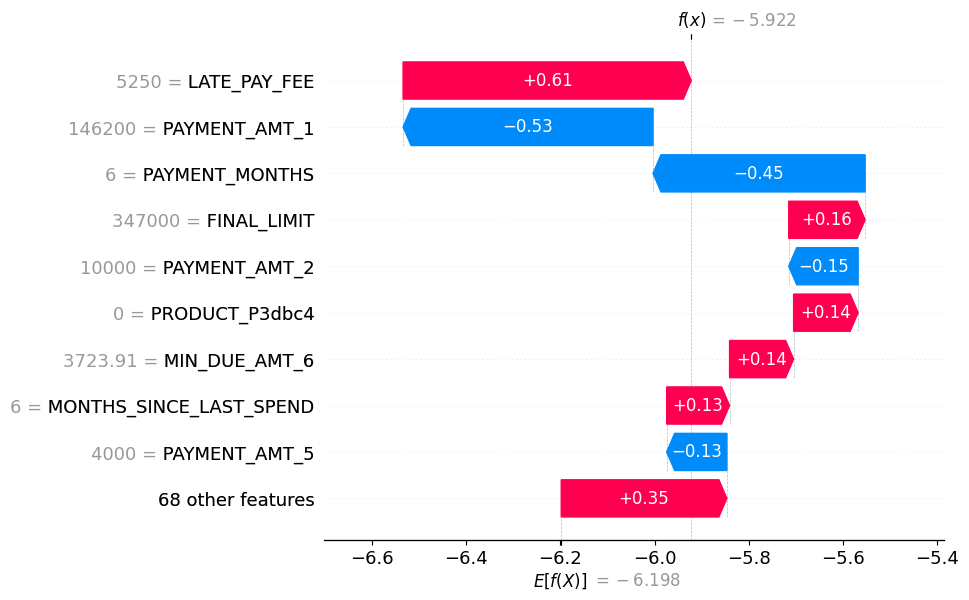

In [33]:
shap.plots.waterfall(shap_values[4])

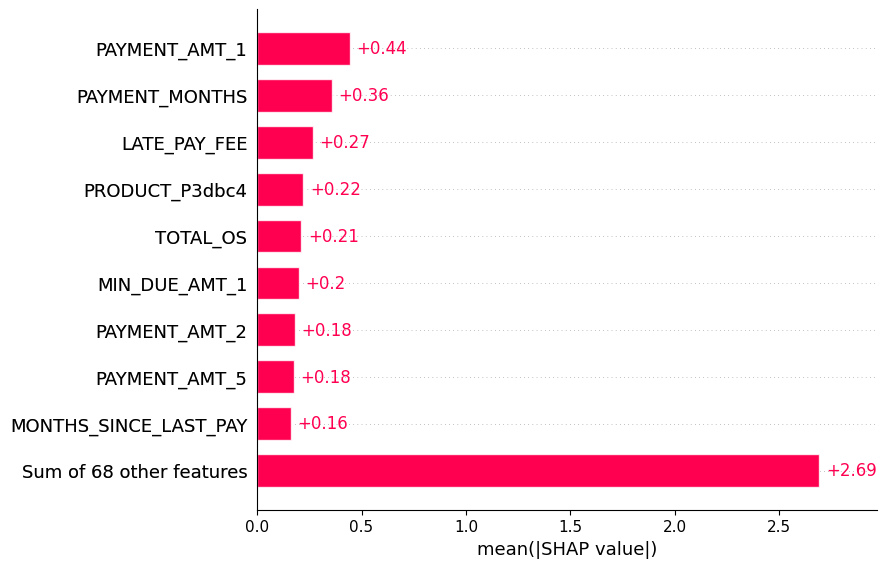

In [34]:
shap.plots.bar(shap_values)

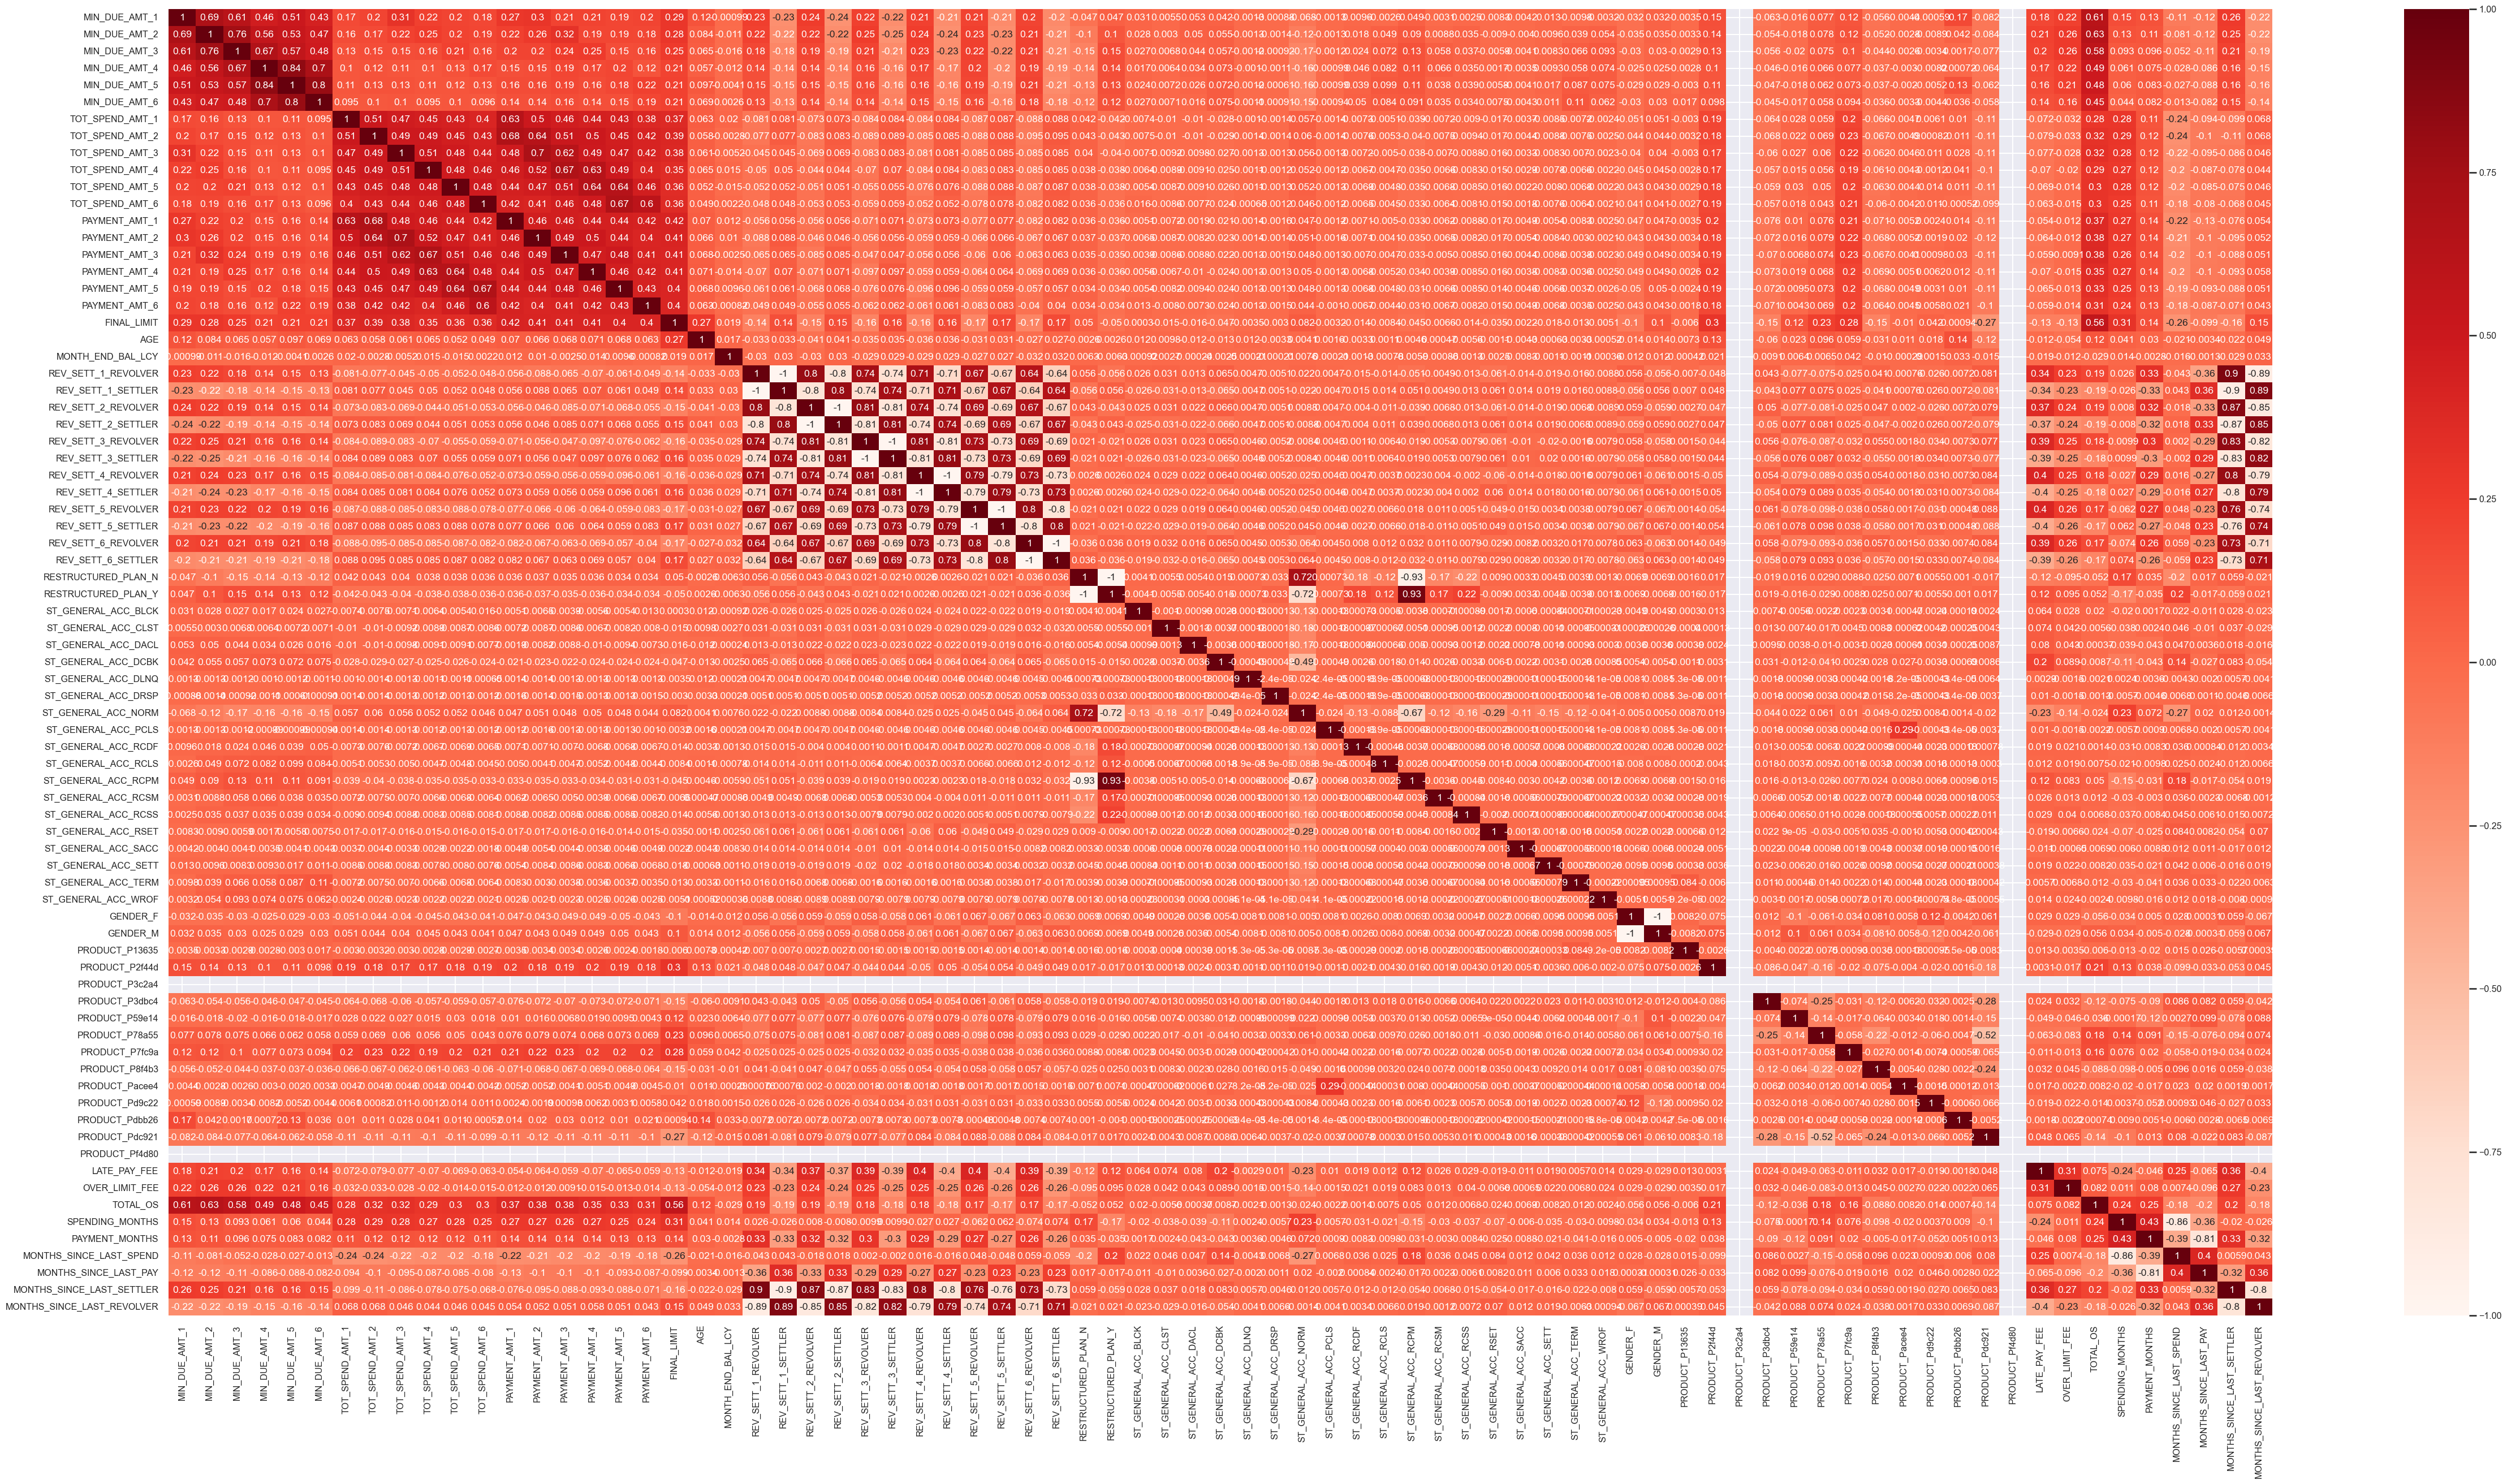

In [30]:
sns.set(rc={'figure.figsize':(60,30)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(data2.iloc[:,:].corr(), cmap='Reds', annot=True);